# Data loading and preprocessing

In [ ]:
cd DS_alignments

In [ ]:
##import dependencies
import numpy as np
import pandas as pd
import glob
import os
##Import my QuickNII to csv conversion tool
from utilities.QuickNII_functions import XML_to_csv

In [3]:
###Load the DeepSlice Alignments
DAB_DS = XML_to_csv('DeepSlice_alignments/DeepSlice___DAB.xml')
CAMKII_DS = XML_to_csv('DeepSlice_alignments/DeepSlice__CAMKII_.xml')
GLTa_DS = XML_to_csv('DeepSlice_alignments/DeepSlice__GLTa.xml')
ISH_DS = XML_to_csv('DeepSlice_alignments/ISH_Calb1___DeepSlice_prop_angles_Gauss.xml')
MYELIN_DS = XML_to_csv('DeepSlice_alignments/Myelin___DeepSlice_prop_angles_Gauss.xml')
PCP2_DS = XML_to_csv('DeepSlice_alignments/tTa_PcP2DeepSlice_prop_angles_Gauss.xml')
PITX_DS = XML_to_csv('DeepSlice_alignments/tTa_PITx3___DeepSlice_prop_angles_Gauss.xml')
###Load the Bjaalie group alignments
DAB_JB = XML_to_csv('Bjaalie_alignments/Mouse_series_DAB_staining - human.xml')
CAMKII_JB = XML_to_csv('Bjaalie_alignments/tTA_CamKII_updated_op2.xml')
GLTa_JB = XML_to_csv('Bjaalie_alignments/NM01_GLT1a_op2.xml')
ISH_JB = XML_to_csv('Bjaalie_alignments/Coronal_Calb1_Allen_71717640 -human.xml')
MYELIN_JB = XML_to_csv('Bjaalie_alignments/NM01_Myelin_op2.xml')
PCP2_JB = XML_to_csv('Bjaalie_alignments/1261_tTA_cut_op2.xml')
PITX_JB = XML_to_csv('Bjaalie_alignments/tTA_6517_Pitx3_coronal_cut-op2.xml')
###Load the McMullan group alignments
DAB_SM = XML_to_csv('Simon_alignments/Mouse_series_DAB_staining - SM.xml')
CAMKII_SM = XML_to_csv('Simon_alignments/tTA_CamKII_updated_SM2.xml')
GLTa_SM = XML_to_csv('Simon_alignments/NM01_GLT1a_SM.xml')
PITX_SM = XML_to_csv('Simon_alignments/tTA_6517_Pitx3___coronal_SM.flipped.xml')
###Alignments in progress
# ISH_SM = pd.read_csv('Simon_alignments/...xml')
# MYELIN_SM = pd.read_csv('Simon_alignments/...xml')
# PCP2_SM = pd.read_csv('Simon_alignments/...xml')


##I found the order of the DS datasets is reversed so I fix that here
DAB_DS = DAB_DS[::-1].reset_index(drop=True)
CAMKII_DS = CAMKII_DS[::-1].reset_index(drop=True)
GLTa_DS = GLTa_DS[::-1].reset_index(drop=True)
ISH_DS = ISH_DS[::-1].reset_index(drop=True) 
MYELIN_DS = MYELIN_DS[::-1].reset_index(drop=True)   
PCP2_DS = PCP2_DS[::-1].reset_index(drop=True) 
PITX_DS = PITX_DS[::-1].reset_index(drop=True)  

##put the datasets in a list for easy modifications
datasets = [DAB_DS, CAMKII_DS, GLTa_DS, ISH_DS, MYELIN_DS, PCP2_DS, PITX_DS, DAB_JB, CAMKII_JB, GLTa_JB,
           ISH_JB, MYELIN_JB, PCP2_JB, PITX_JB, DAB_SM, CAMKII_SM, GLTa_SM, PITX_SM ]

DS_datasets = [DAB_DS, CAMKII_DS, GLTa_DS, PITX_DS, ISH_DS, MYELIN_DS, PCP2_DS]

SM_datasets = [DAB_SM, CAMKII_SM, GLTa_SM, PITX_SM ]

JB_datasets = [DAB_JB, CAMKII_JB, GLTa_JB, PITX_JB, ISH_JB, MYELIN_JB, PCP2_JB]



In [4]:


def data_formatter(data, columns):
    data[columns] = data[columns].astype(np.float64)
    return data

In [5]:
columns = ['ox', 'oy' ,'oz', 'ux', 'uy', 'uz', 'vx', 'vy', 'vz']
##Function to change the coordinate columns to floating point values

##set all the coordinate columns to floating point values
datasets = [data_formatter(data, columns) for data in datasets]



# Distance Analysis

In [6]:
###Here we compare the data simon has aligned to the data Jan Bjaalies group has aligned

###Get the average corner distance for each dataset Simon has aligned
Expert_distances = [(abs(SM_datasets[i][columns]-JB_datasets[i][columns]).mean().mean()) for i in range(len(SM_datasets))]
###Get the average standard deviation for each dataset Simon has aligned
Expert_standard_dev = [(abs(SM_datasets[i][columns]-JB_datasets[i][columns]).mean(axis=1).std()) for i in range(len(SM_datasets))]
###Here we compare the data simon has aligned to the data DeepSlice has aligned

###Get the average corner distance for each dataset Simon and DeepSlice has aligned
SM_DS_distances = [(abs(SM_datasets[i][columns]-DS_datasets[i][columns]).mean().mean()) for i in range(len(SM_datasets))]
###Get the average standard deviation for each dataset Simon and DeepSlice has aligned
SM_DS_standard_dev = [(abs(SM_datasets[i][columns]-DS_datasets[i][columns]).mean(axis=1).std()) for i in range(len(SM_datasets))]

###Get the average corner distance for each dataset Simon and DeepSlice has aligned
JB_DS_distances = [(abs(JB_datasets[i][columns]-DS_datasets[i][columns]).mean().mean()) for i in range(len(SM_datasets))]
###Get the average standard deviation for each dataset Simon and DeepSlice has aligned
JB_DS_standard_dev = [(abs(JB_datasets[i][columns]-DS_datasets[i][columns]).mean(axis=1).std()) for i in range(len(DS_datasets))]

In [7]:
JB_DS_distances

[9.43761342294645, 16.734594984846563, 14.567721163656593, 14.08984679992698]

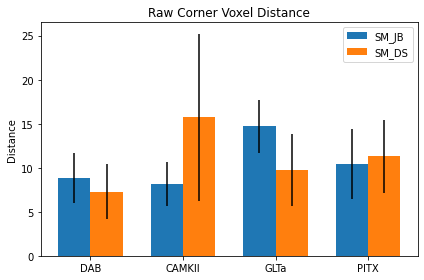

In [22]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ind = np.arange(len(SM_datasets))
width = 0.35  # the width of the bars

SM_JB_Bar = ax.bar(ind - width/2, Expert_distances, width, yerr=Expert_standard_dev,
                label='SM_JB')

SM_DS_Bar = ax.bar(ind + width/2, SM_DS_distances, width, yerr=SM_DS_standard_dev,
                label='SM_DS')

# JB_DS_Bar = ax.bar(ind + width/2, JB_DS_distances, width, yerr=JB_DS_standard_dev,
#                 label='JB_DS')



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

        
        
ax.set_ylabel('Distance')
ax.set_title('Raw Corner Voxel Distance')
ax.set_xticks(ind)
ax.set_xticklabels(('DAB', 'CAMKII', 'GLTa', 'PITX'))
ax.legend()


# autolabel(rects1, "left")
# autolabel(rects2, "right")

fig.tight_layout()

plt.show()

In [73]:
Expert_distances

[8.861819632209734, 8.1221723433491, 14.691474071153197, 10.430264322576718]

In [74]:
Expert_standard_dev

[2.8494026199160856, 2.4873551659375823, 3.007182995260069, 4.003279406366454]

In [75]:
SM_DS_distances

[7.288777333659411, 15.711969525516517, 9.768851610100869, 11.298725141943205]

In [85]:
SM_DS_standard_dev

[3.131615810019841, 9.53582029387766, 4.058764762736527, 4.170016366551496]

0      7.422615
1     11.824076
2      9.913621
3      9.926502
4     10.265426
5      9.826156
6     22.957766
7     16.850915
8     12.322657
9      8.964145
10     8.061881
11     8.100702
12    11.080694
13    23.422553
14    12.342488
15     7.679368
16    10.458093
17    10.596138
18    11.661885
19    10.092772
20    10.402626
21    11.276888
22    10.163471
23    10.549543
24     9.787680
25    10.919962
26    10.420557
27    11.044001
28     8.736340
29    11.802293
30     8.139789
31     7.316844
dtype: float64

In [70]:

##here i create a weird average expert score for each slice

EX_AVG_datasets = [(SM_datasets[i][columns] + JB_datasets[i][columns])/2 for i in range(len(SM_datasets))]

###Get the average corner distance for each dataset Simon and DeepSlice has aligned
AVG_DS_distances = [(abs(EX_AVG_datasets[i]-DS_datasets[i][columns]).mean().mean()) for i in range(len(SM_datasets))]
###Get the average standard deviation for each dataset Simon and DeepSlice has aligned
AVG_DS_standard_dev = [(abs(EX_AVG_datasets[i]-DS_datasets[i][columns]).mean(axis=1).std()) for i in range(len(SM_datasets))]



Here we compare Simon to the independant expert and then DeepSlice to both experts independantly, 

We find that except for one dataset deepslice performs comparably to the inter-rater reliability of expert neuroanatomists

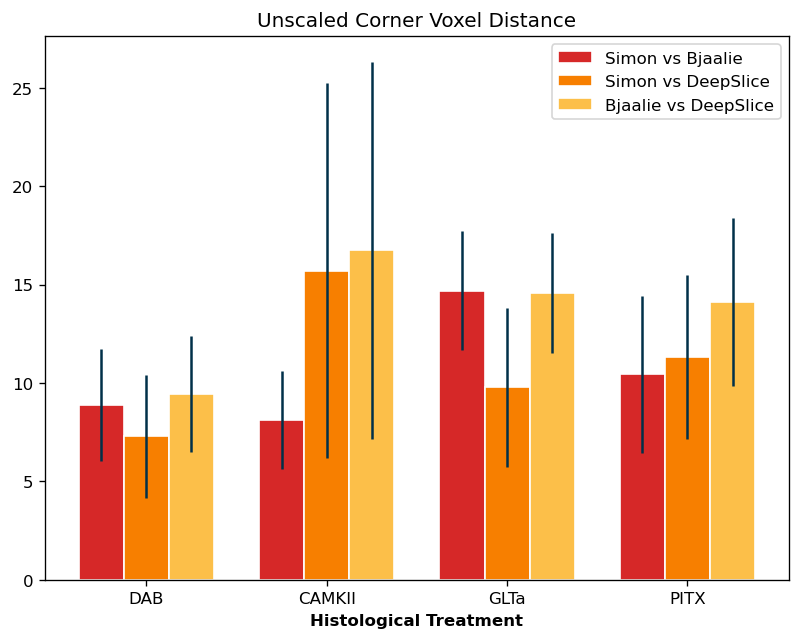

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = Expert_distances
bars2 = SM_DS_distances
bars3 = JB_DS_distances
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, color='#d62828', edgecolor='white', label='Simon vs Bjaalie')
plt.bar(r2, bars2, width=barWidth, color='#f77f00', edgecolor='white', label='Simon vs DeepSlice')
plt.bar(r3, bars3, width=barWidth, color='#fcbf49', edgecolor='white',label='Bjaalie vs DeepSlice')
for r, dist, dev in zip([r1,r2,r3],[Expert_distances,SM_DS_distances,JB_DS_distances],[Expert_standard_dev,SM_DS_standard_dev,JB_DS_standard_dev]):
    for i in range(4):
        plt.errorbar(r[i],dist[i], dev[i],color='#003049')
plt.title('Unscaled Corner Voxel Distance')
# Add xticks on the middle of the group bars
plt.xlabel('Histological Treatment', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['DAB', 'CAMKII', 'GLTa', 'PITX'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

Theoretically the average of the experts should be more accurate than either one independantly so here we average the two datasets and compare this to the performance of DeepSlice

In [103]:
##Here we perform a paired students t-test
from scipy.stats import ttest_rel
DS_Experts_error = [abs(EX_AVG_datasets[i]-DS_datasets[i][columns]).mean(axis=1) for i in range(len(SM_datasets))]

SM_JB_error = [abs(SM_datasets[i][columns]-JB_datasets[i][columns]).mean(axis=1) for i in range(len(SM_datasets))]
##Im removing 2 nan values from The second dataset
SM_JB_error[1] = SM_JB_error[1][:-2]
DS_Experts_error[1] = DS_Experts_error[1][:-2]
p_val = []
for DS_EX, SM_JB in zip(DS_Experts_error, SM_JB_error):
    stat, p = ttest_rel(DS_EX, SM_JB)
    p_val.append(p)
    print('stat=%.3f, p=%.6f' % (stat, p))

In [102]:
SM_JB_error[1]

0     16.073334
1     11.950921
2      5.760775
3      6.733696
4      9.158082
5      4.716084
6      5.230941
7      6.542839
8      7.538278
9     10.096551
10     9.613721
11     5.669621
12     6.695313
13     7.553126
14     5.479453
15     5.959492
16     8.386728
17     6.933637
18     7.388813
19     5.919469
20     7.381936
21     5.240320
22    12.071024
23    11.425582
24     6.842661
25     7.580432
26     8.330230
27    13.126963
28     9.919452
29    11.423028
30     7.038753
31     6.817794
32     5.610324
33    10.995550
34     8.271605
35    10.534212
36     8.561675
37     9.267296
38     7.594814
39    11.313951
40     6.717621
41     8.280246
42     6.949005
43     5.374237
44     5.428172
dtype: float64

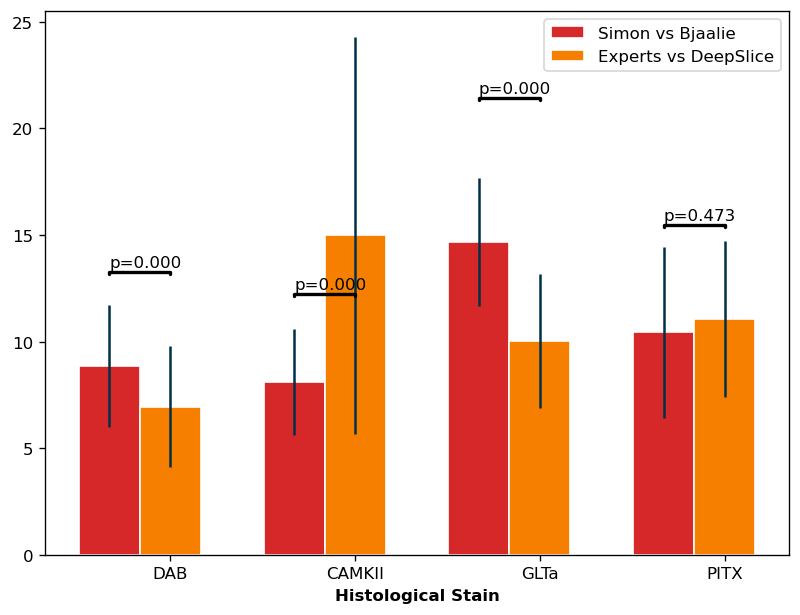

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# set width of bar
barWidth = 0.33
 
# set height of bar
bars1 = Expert_distances
bars2 = AVG_DS_distances
# bars3 = JB_DS_distances
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, color='#d62828', edgecolor='white', label='Simon vs Bjaalie')
plt.bar(r2, bars2, width=barWidth, color='#f77f00', edgecolor='white', label='Experts vs DeepSlice')
# plt.bar(r3, bars3, width=barWidth, color='#fcbf49', edgecolor='white',label='Bjaalie vs DeepSlice')
for r, dist, dev in zip([r1,r2],[Expert_distances,AVG_DS_distances],[Expert_standard_dev,AVG_DS_standard_dev]):
    for i in range(4):
        plt.errorbar(r[i],dist[i], dev[i],color='#003049')
# Add xticks on the middle of the group bars
plt.xlabel('Histological Stain', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['DAB', 'CAMKII', 'GLTa', 'PITX'])
combine = []
for i, j in zip(r1,r2):
    combine.append(i)
    combine.append(j)
##label significant difference
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.4*max(Y[int(i/2)], Y[int(j/2)])
    dx = abs(X[i]-X[j])
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':2}
    plt.annotate(text, xy=(X[i],y+1.1), zorder=10)
    plt.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
    
for i,p in zip(range(0,8,2), p_val):
    label_diff(i,i+1,'p=%.3f'% p,combine,bars1)
# Create legend & Show graphic
plt.legend()
plt.show()

Here you can see that of the three comparisons for which DeepSliceVsExpertAverage and SimonVsBjaalie were significantly different, in two cases DeepSlices error was actually lower. In the one case where it was higher DeepSlice had failed on this datatype.
